## Libraries  

In [1]:
# data manipulation
import pandas as pd
import numpy as np 


# data visualization
import matplotlib.pyplot as plt     
import seaborn as sns 

# remove warnings
import warnings
warnings.filterwarnings('ignore')


# fixed the figure size for all plots
plt.rcParams['figure.figsize'] = (12,6)

#ipaddress checked
import ipaddress

## Data Load and Insight

In [2]:
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
# checking for missing values
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Observation
- There is no missing or null value.

In [6]:
# check duplicate values
df.duplicated().sum()

np.int64(0)

Observation
- There is no duplicate values or rows

In [7]:
df.columns     

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

## Data Processing & EDA

In [8]:
# splitting date and time from 'TransactionDate' and 'PreviousTransactionDate'
# df['TransTime'] = df['TransactionDate'].str.split(' ').str[1]
# df['TransDate'] = df['TransactionDate'].str.split(' ').str[0]
# df['PreviousTransDate'] = df['PreviousTransactionDate'].str.split(' ').str[0]
# df['PreviousTransTime'] = df['PreviousTransactionDate'].str.split(' ').str[1]

# Convert to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Extract date and time
df['TransDate'] = df['TransactionDate'].dt.date
df['TransTime'] = df['TransactionDate'].dt.time

df['PreviousTransDate'] = df['PreviousTransactionDate'].dt.date
df['PreviousTransTime'] = df['PreviousTransactionDate'].dt.time

#change the ip address to private and public
df['IP'] = df['IP Address'].apply(lambda x: 'Private' if ipaddress.ip_address(x).is_private else 'Public')


In [9]:
# drop original columns
df.drop(columns=['TransactionDate', 'PreviousTransactionDate', 'IP Address'], inplace=True)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransDate,TransTime,PreviousTransDate,PreviousTransTime,IP
0,TX000001,AC00128,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,2023-04-11,16:29:14,2024-11-04,08:08:08,Public
1,TX000002,AC00455,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,2023-06-27,16:44:19,2024-11-04,08:09:35,Public
2,TX000003,AC00019,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,2023-07-10,18:16:08,2024-11-04,08:07:04,Public
3,TX000004,AC00070,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,2023-05-05,16:32:11,2024-11-04,08:09:06,Public
4,TX000005,AC00411,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,2023-10-16,17:51:24,2024-11-04,08:06:39,Public


In [10]:
# converting date columns to datetime format
df['TransDate'] = pd.to_datetime(df['TransDate'])
df['PreviousTransDate'] = pd.to_datetime(df['PreviousTransDate'])   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionID        2512 non-null   object        
 1   AccountID            2512 non-null   object        
 2   TransactionAmount    2512 non-null   float64       
 3   TransactionType      2512 non-null   object        
 4   Location             2512 non-null   object        
 5   DeviceID             2512 non-null   object        
 6   MerchantID           2512 non-null   object        
 7   Channel              2512 non-null   object        
 8   CustomerAge          2512 non-null   int64         
 9   CustomerOccupation   2512 non-null   object        
 10  TransactionDuration  2512 non-null   int64         
 11  LoginAttempts        2512 non-null   int64         
 12  AccountBalance       2512 non-null   float64       
 13  TransDate            2512 non-nul

In [11]:
df['TransactionType'].value_counts()

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

In [12]:
df['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

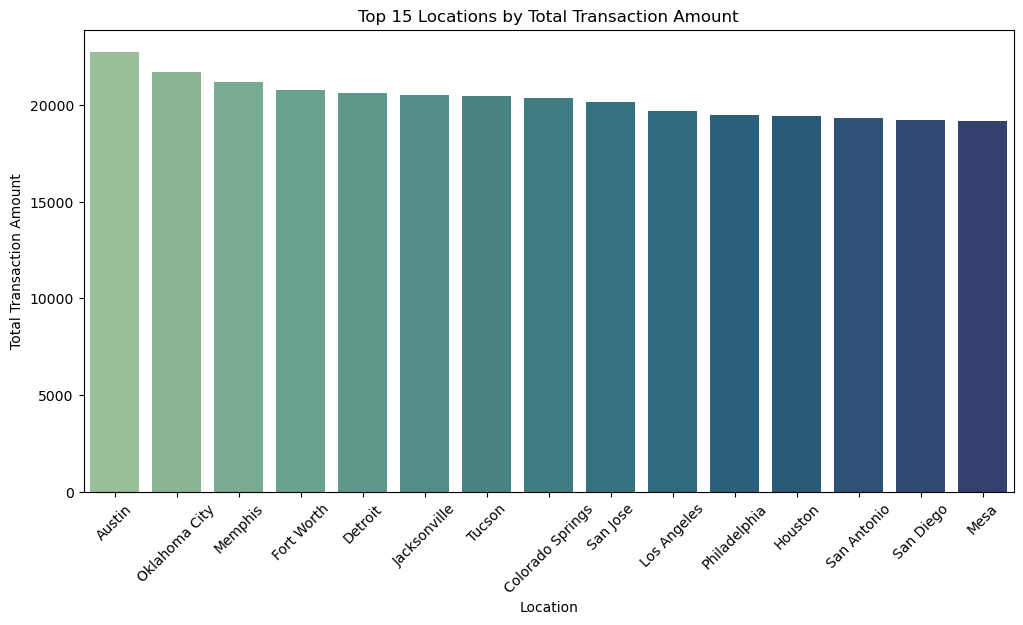

In [13]:
# Top 15 Locations by Total Transaction Amount
top_city = df.groupby('Location')['TransactionAmount'].sum().reset_index(name='Total') .sort_values('Total', ascending=False).head(15)
# bar plot of location vs total transaction amount
sns.barplot(data=top_city, x='Location', y='Total', palette='crest')
plt.title('Top 15 Locations by Total Transaction Amount')   
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()


Observation
-  Top city of transaction in Austin

In [14]:
df['Channel'].unique()

array(['ATM', 'Online', 'Branch'], dtype=object)

  Channel      Total
0     ATM  256331.43
1  Branch  250183.00
2  Online  241041.14


Text(0, 0.5, 'Total Transaction Amount')

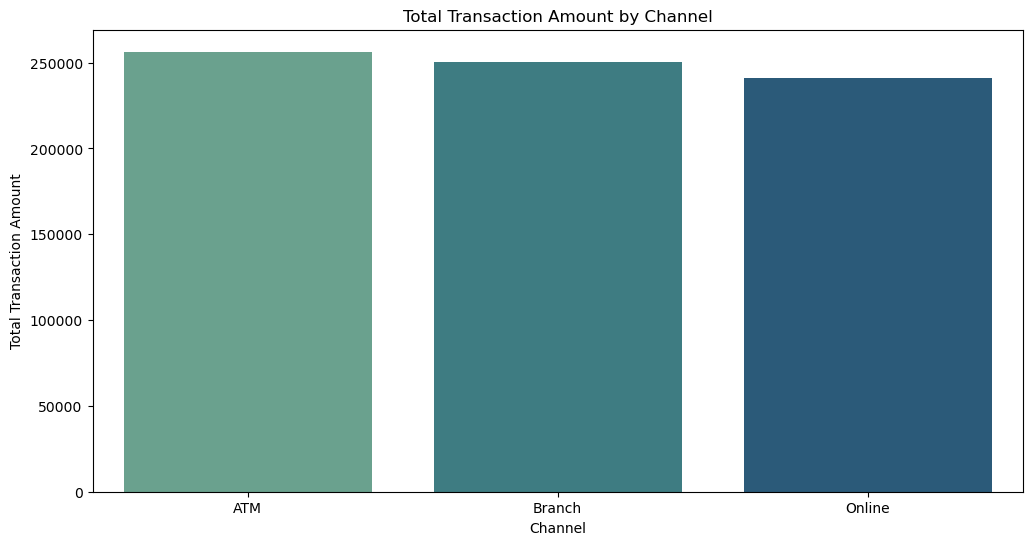

In [15]:
# Channel by Total Transaction Amount
channel = df.groupby('Channel')['TransactionAmount'].sum().reset_index(name='Total') .sort_values('Total', ascending=False)
print(channel)
# bar plot of location vs total transaction amount
sns.barplot(data=channel, x='Channel', y='Total', palette='crest')
plt.title('Total Transaction Amount by Channel')   
plt.xlabel('Channel')
plt.ylabel('Total Transaction Amount')

In [16]:
# Top 15 Locations by Total Transaction Amount
top_city_debit = df[df['TransactionType'] == 'Debit'].groupby('Location')['TransactionType'].value_counts().reset_index(name='Total').sort_values('Total', ascending=False)
print(top_city.head(3))
print()
top_city_credit = df[df['TransactionType'] == 'Credit'].groupby('Location')['TransactionType'].value_counts().reset_index(name='Total').sort_values('Total', ascending=False)
print(top_city_credit.head(3))

         Location     Total
2          Austin  22740.90
28  Oklahoma City  21716.04
22        Memphis  21170.53

        Location TransactionType  Total
2         Austin          Credit     23
30  Philadelphia          Credit     19
17  Jacksonville          Credit     18


Observation
- Top debit city = Charlotte, Fort Worth, Log Angeles
- Top credit city =  Austin, Philadelphia, Jacksonville

In [17]:
# Add labels on each bar
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            return ax.annotate(
                text=str(int(height)),
                xy=(p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                xytext=(0, 4),
                textcoords='offset points'
            )

In [18]:
# Add labels on each bar function
def add_bar_labels(ax, offset=4):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                text=str(int(height)),
                xy=(p.get_x() + p.get_width() / 2, height),
                ha='center',
                va='bottom',
                xytext=(0, offset),
                textcoords='offset points'
            )

   Channel  LoginAttempts  Total
8   Online              3     17
4   Branch              5     16
0      ATM              2     15
9   Online              4     13
1      ATM              4     12
2      ATM              5      9
5   Branch              2      9
3      ATM              3      8
10  Online              5      7
6   Branch              4      7
7   Branch              3      6
11  Online              2      3


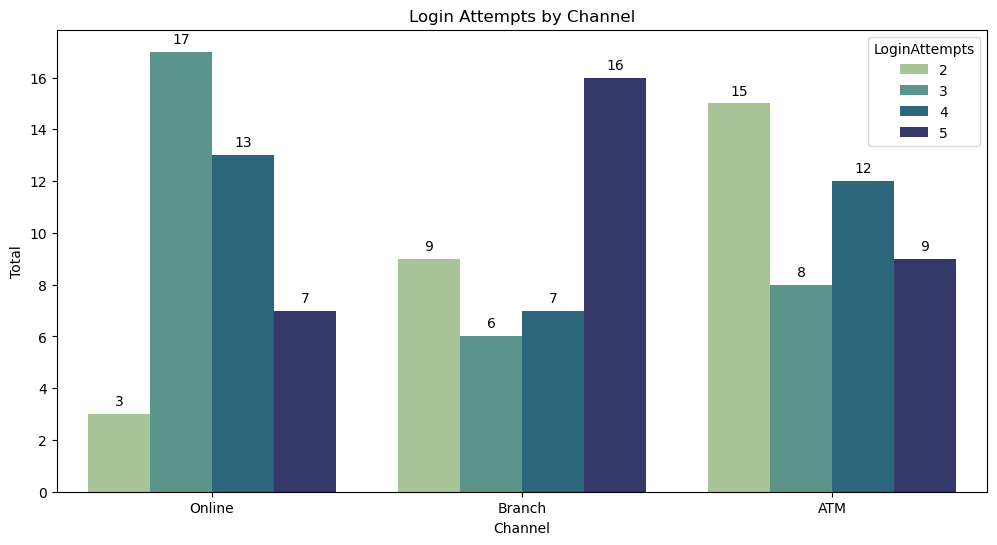

In [19]:
# login attempts by channel
login_attempts = df[df['LoginAttempts'] > 1].groupby('Channel')['LoginAttempts'].value_counts().reset_index(name='Total').sort_values('Total', ascending=False)
print(login_attempts)
# visualize login attempts by channel
ax = sns.barplot(data=login_attempts, x='Channel', y='Total', hue='LoginAttempts', palette='crest')
plt.title('Login Attempts by Channel')
plt.xlabel('Channel')
plt.ylabel('Total')


add_bar_labels(ax)

Observation
- Online channel has the most repeated login issues, especially 3–4 attempts.
- Branch channel has a concerning number of extreme repeated attempts (5 times).
- ATM channel shows quick recovery from login failure (most users succeed within 2 attempts).

Text(0, 0.5, 'Count')

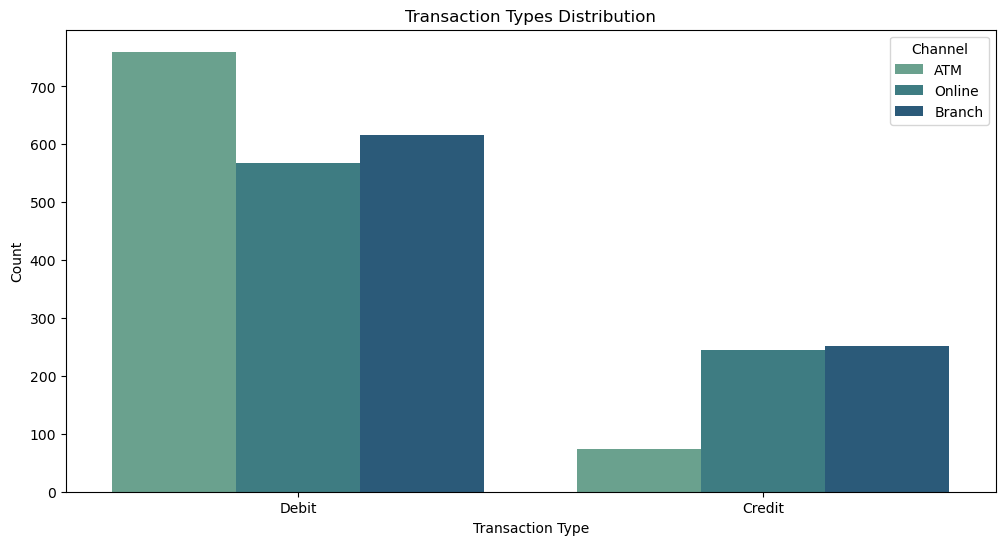

In [20]:
# visualize transaction types vs channel  
sns.countplot(data=df, x='TransactionType', hue='Channel', palette='crest')
plt.title('Transaction Types Distribution') 
plt.xlabel('Transaction Type')
plt.ylabel('Count')             

Observation
- Most of the Credited happened with Branch Channel
- Most of the Debited happened with ATM

  Channel TransactionType  Total
0     ATM           Debit    760
2  Branch           Debit    617
4  Online           Debit    567
3  Branch          Credit    251
5  Online          Credit    244
1     ATM          Credit     73


Text(0, 0.5, 'Amount')

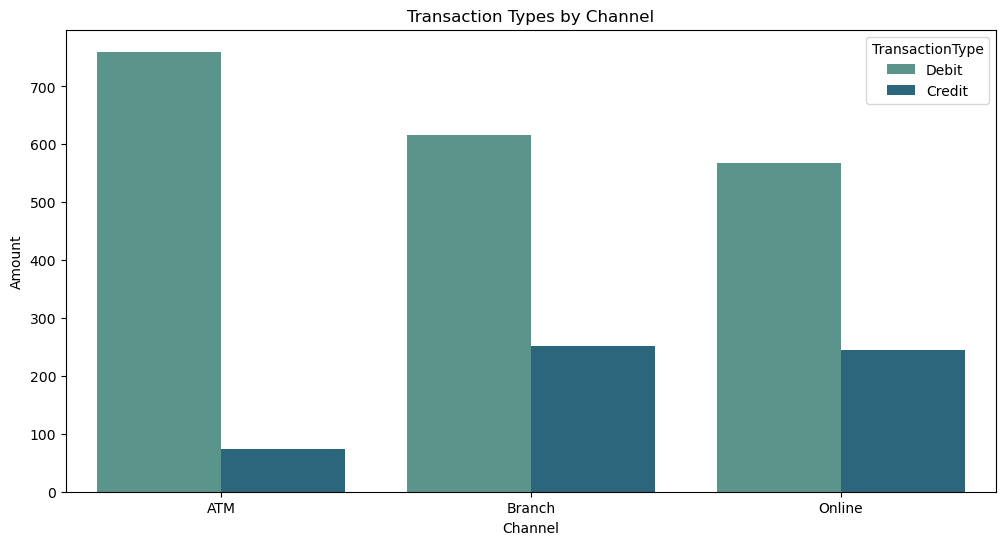

In [21]:
# channel vs transaction type
channelVSType = df.groupby('Channel')['TransactionType'].value_counts().reset_index(name='Total') .sort_values('Total', ascending=False)
print(channelVSType)
# visualize transaction types
sns.barplot(data = channelVSType, x = 'Channel', y = 'Total', palette='crest', hue='TransactionType')
plt.title('Transaction Types by Channel')
plt.xlabel('Channel')
plt.ylabel('Amount')

Observation
- Debit is occurring most in the ATM channel
- Credit is occurring most in BRanch Channel

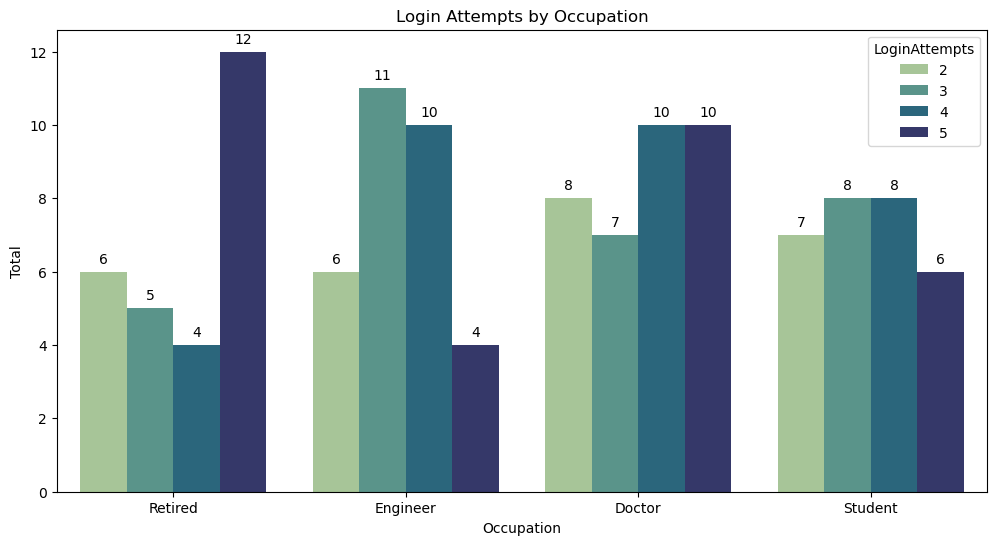

In [22]:
#login attempts vs occupation
login_occupation = df[df['LoginAttempts'] > 1].groupby('CustomerOccupation')['LoginAttempts'].value_counts().reset_index(name='Total').sort_values('Total', ascending=False)    
login_occupation_plot = sns.barplot(data=login_occupation, x='CustomerOccupation', y='Total', hue='LoginAttempts', palette='crest')
plt.title('Login Attempts by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total')

add_bar_labels(login_occupation_plot)

Observation:
- Retired person are taking so many attempt to login , then Doctor, Student, Engineer

In [23]:
df.IP.unique()

array(['Public', 'Private'], dtype=object)

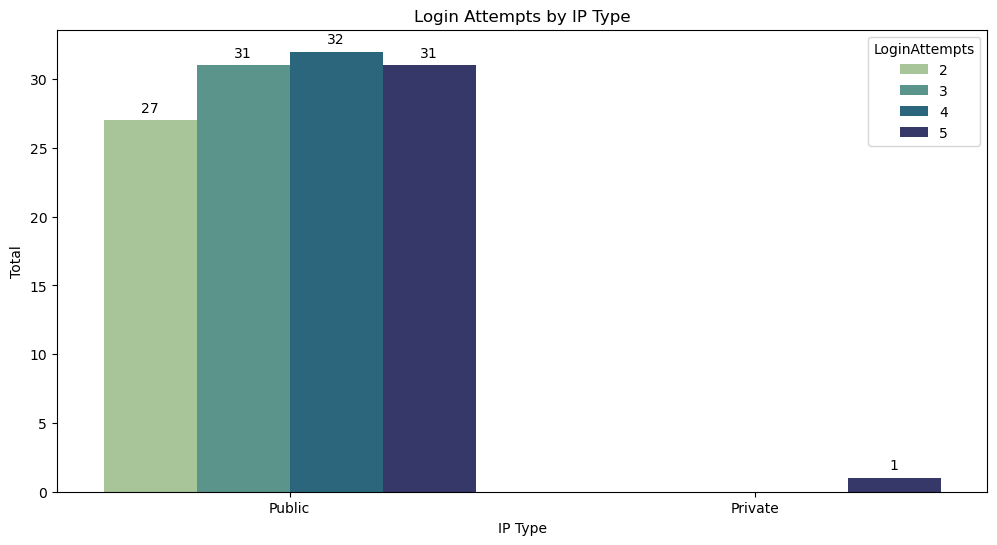

In [24]:
#login attempts vs ip type
IpVsLogin = df[df['LoginAttempts'] > 1].groupby('IP')['LoginAttempts'].value_counts().reset_index(name='Total').sort_values('Total', ascending=False)
IpVsLogin_plot = sns.barplot(data=IpVsLogin, x='IP', y='Total', hue='LoginAttempts', palette='crest')
plt.title('Login Attempts by IP Type')  
plt.xlabel('IP Type')
plt.ylabel('Total')

add_bar_labels(IpVsLogin_plot)

Observation
- Public Ip used Most for the login attempt

   LoginAttempts  Total_Amount
0              2       9020.10
1              3       8243.64
2              4       8120.39
3              5       9886.78


Text(0, 0.5, 'Amount')

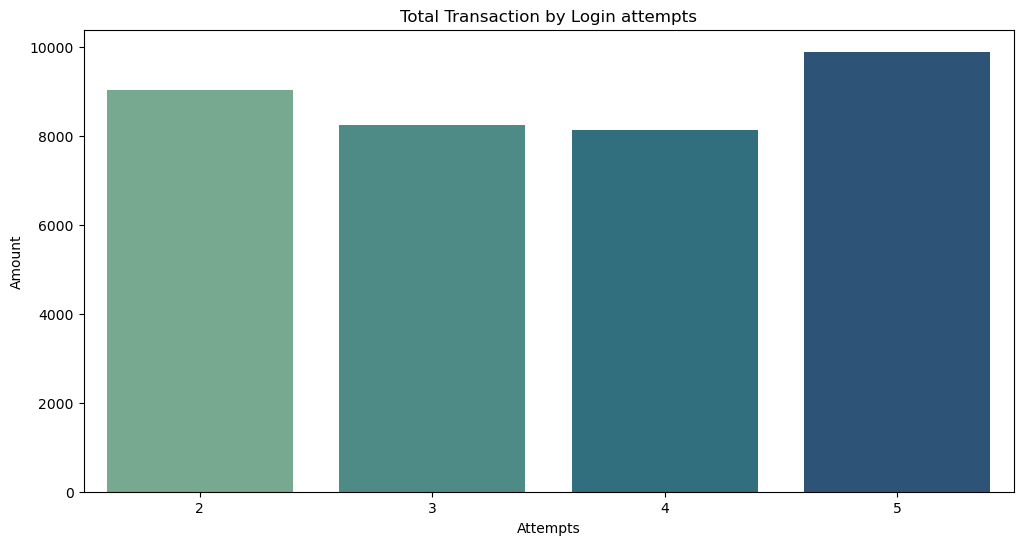

In [25]:
#loginattempt vs transaction amount
LoginVsTrans = df[df['LoginAttempts'] > 1].groupby('LoginAttempts')['TransactionAmount'].sum().reset_index(name='Total_Amount')
print(LoginVsTrans)
# visualize transaction types
sns.barplot(data = LoginVsTrans, x = 'LoginAttempts', y = 'Total_Amount', palette='crest')
plt.title('Total Transaction by Login attempts')
plt.xlabel('Attempts')
plt.ylabel('Amount')

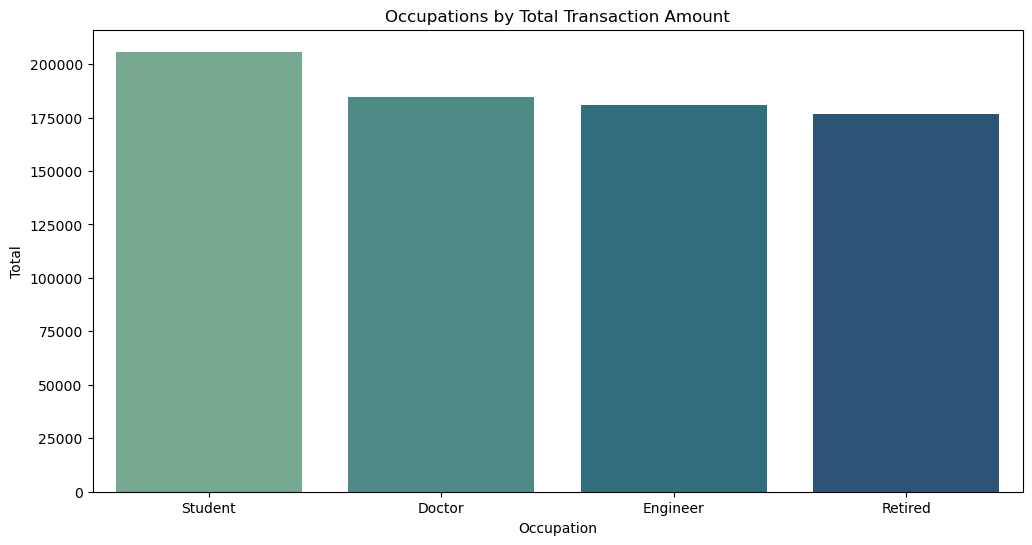

In [26]:
# occupations by total transaction amount
top_occupation = df.groupby('CustomerOccupation')['TransactionAmount'].sum().reset_index(name='Total') .sort_values('Total', ascending=False)
sns.barplot(data=top_occupation, x='CustomerOccupation', y='Total', palette='crest')
plt.title('Occupations by Total Transaction Amount')                
plt.xlabel('Occupation')
plt.ylabel('Total')
add_bar_labels(ax)

## Feature Engineering  

In [27]:
df1 = df.copy()
df1.drop(['AccountID', 'TransactionID', 'DeviceID', 'MerchantID', 'TransDate', 'TransTime', 'PreviousTransDate', 'PreviousTransTime', 'Location'], axis=1, inplace=True)
df1.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,IP
0,14.09,Debit,ATM,70,Doctor,81,1,5112.21,Public
1,376.24,Debit,ATM,68,Doctor,141,1,13758.91,Public
2,126.29,Debit,Online,19,Student,56,1,1122.35,Public
3,184.50,Debit,Online,26,Student,25,1,8569.06,Public
4,13.45,Credit,Online,26,Student,198,1,7429.40,Public


In [28]:
df_encoded = pd.get_dummies(df1, columns=['TransactionType', 'Channel','CustomerOccupation' ,'IP'], dtype=int, drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2512 non-null   float64
 1   CustomerAge                  2512 non-null   int64  
 2   TransactionDuration          2512 non-null   int64  
 3   LoginAttempts                2512 non-null   int64  
 4   AccountBalance               2512 non-null   float64
 5   TransactionType_Debit        2512 non-null   int64  
 6   Channel_Branch               2512 non-null   int64  
 7   Channel_Online               2512 non-null   int64  
 8   CustomerOccupation_Engineer  2512 non-null   int64  
 9   CustomerOccupation_Retired   2512 non-null   int64  
 10  CustomerOccupation_Student   2512 non-null   int64  
 11  IP_Public                    2512 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 235.6 KB


In [29]:
# correlation matrix
corr_matrix = df_encoded.corr()

# Unstack the correlation matrix
corr_unstacked = (
    corr_matrix
    .where(~np.eye(corr_matrix.shape[0], dtype=bool))  # remove diagonal
    .unstack()
    .dropna()
)

Text(0.5, 1.0, 'Correlation Matrix')

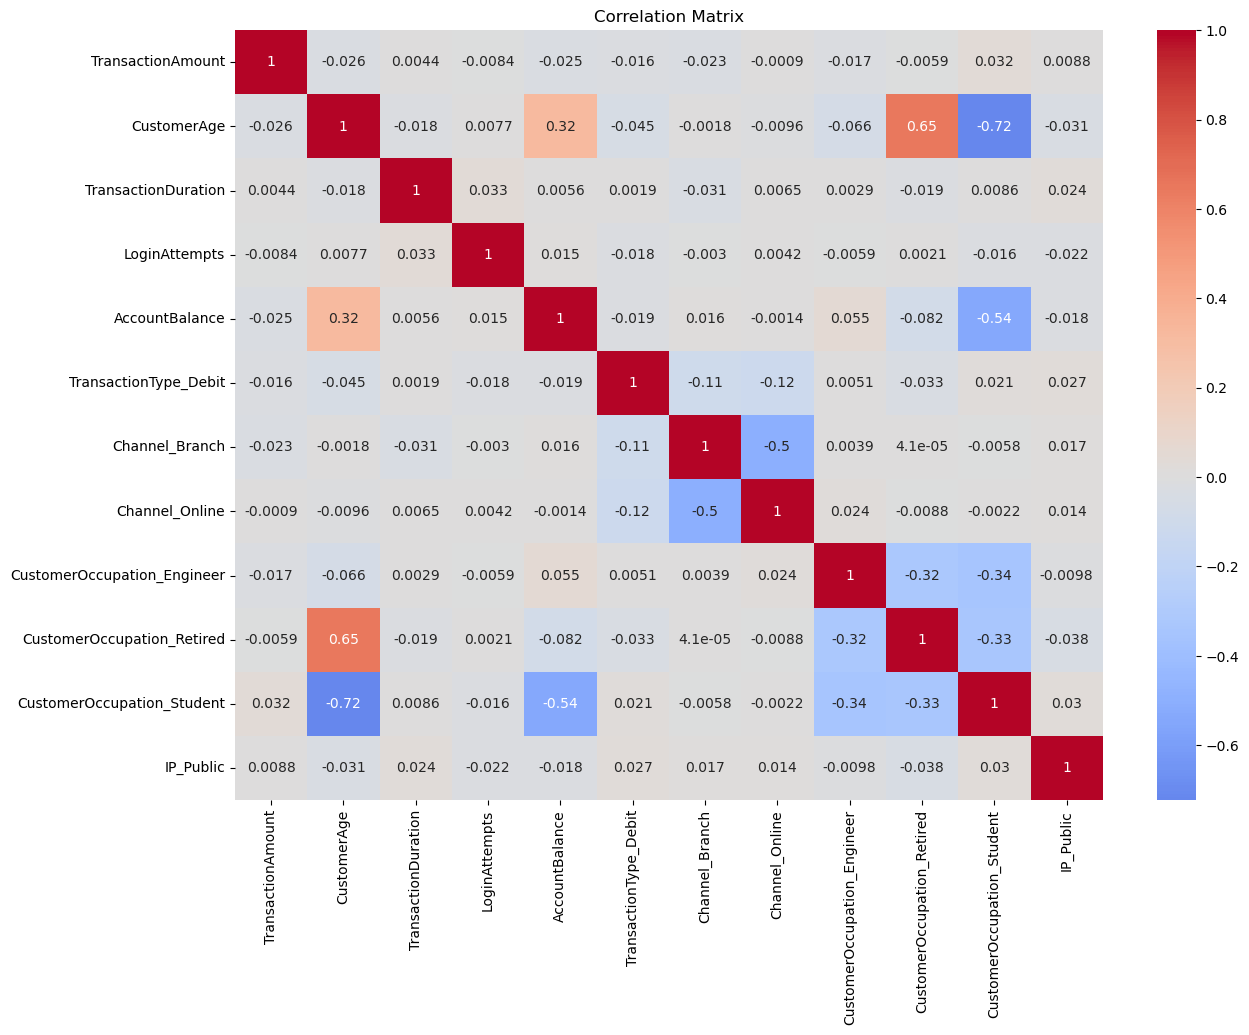

In [30]:
#plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

Strong Correlations:

- CustomerAge strongly correlates with occupation: positive with Retired (0.65), negative with Student (-0.72)
- AccountBalance negatively correlates with Student occupation (-0.54)
- Channel_Branch and Channel_Online are inversely related (-0.5)

Weak Correlations:

- Transaction features (Amount, Duration, LoginAttempts) show minimal correlation with other variables
- IP_Public is largely independent of all other features

Key Insight:
Age drives occupation patterns, which influence account balance. Transaction behaviors appear independent of demographics.

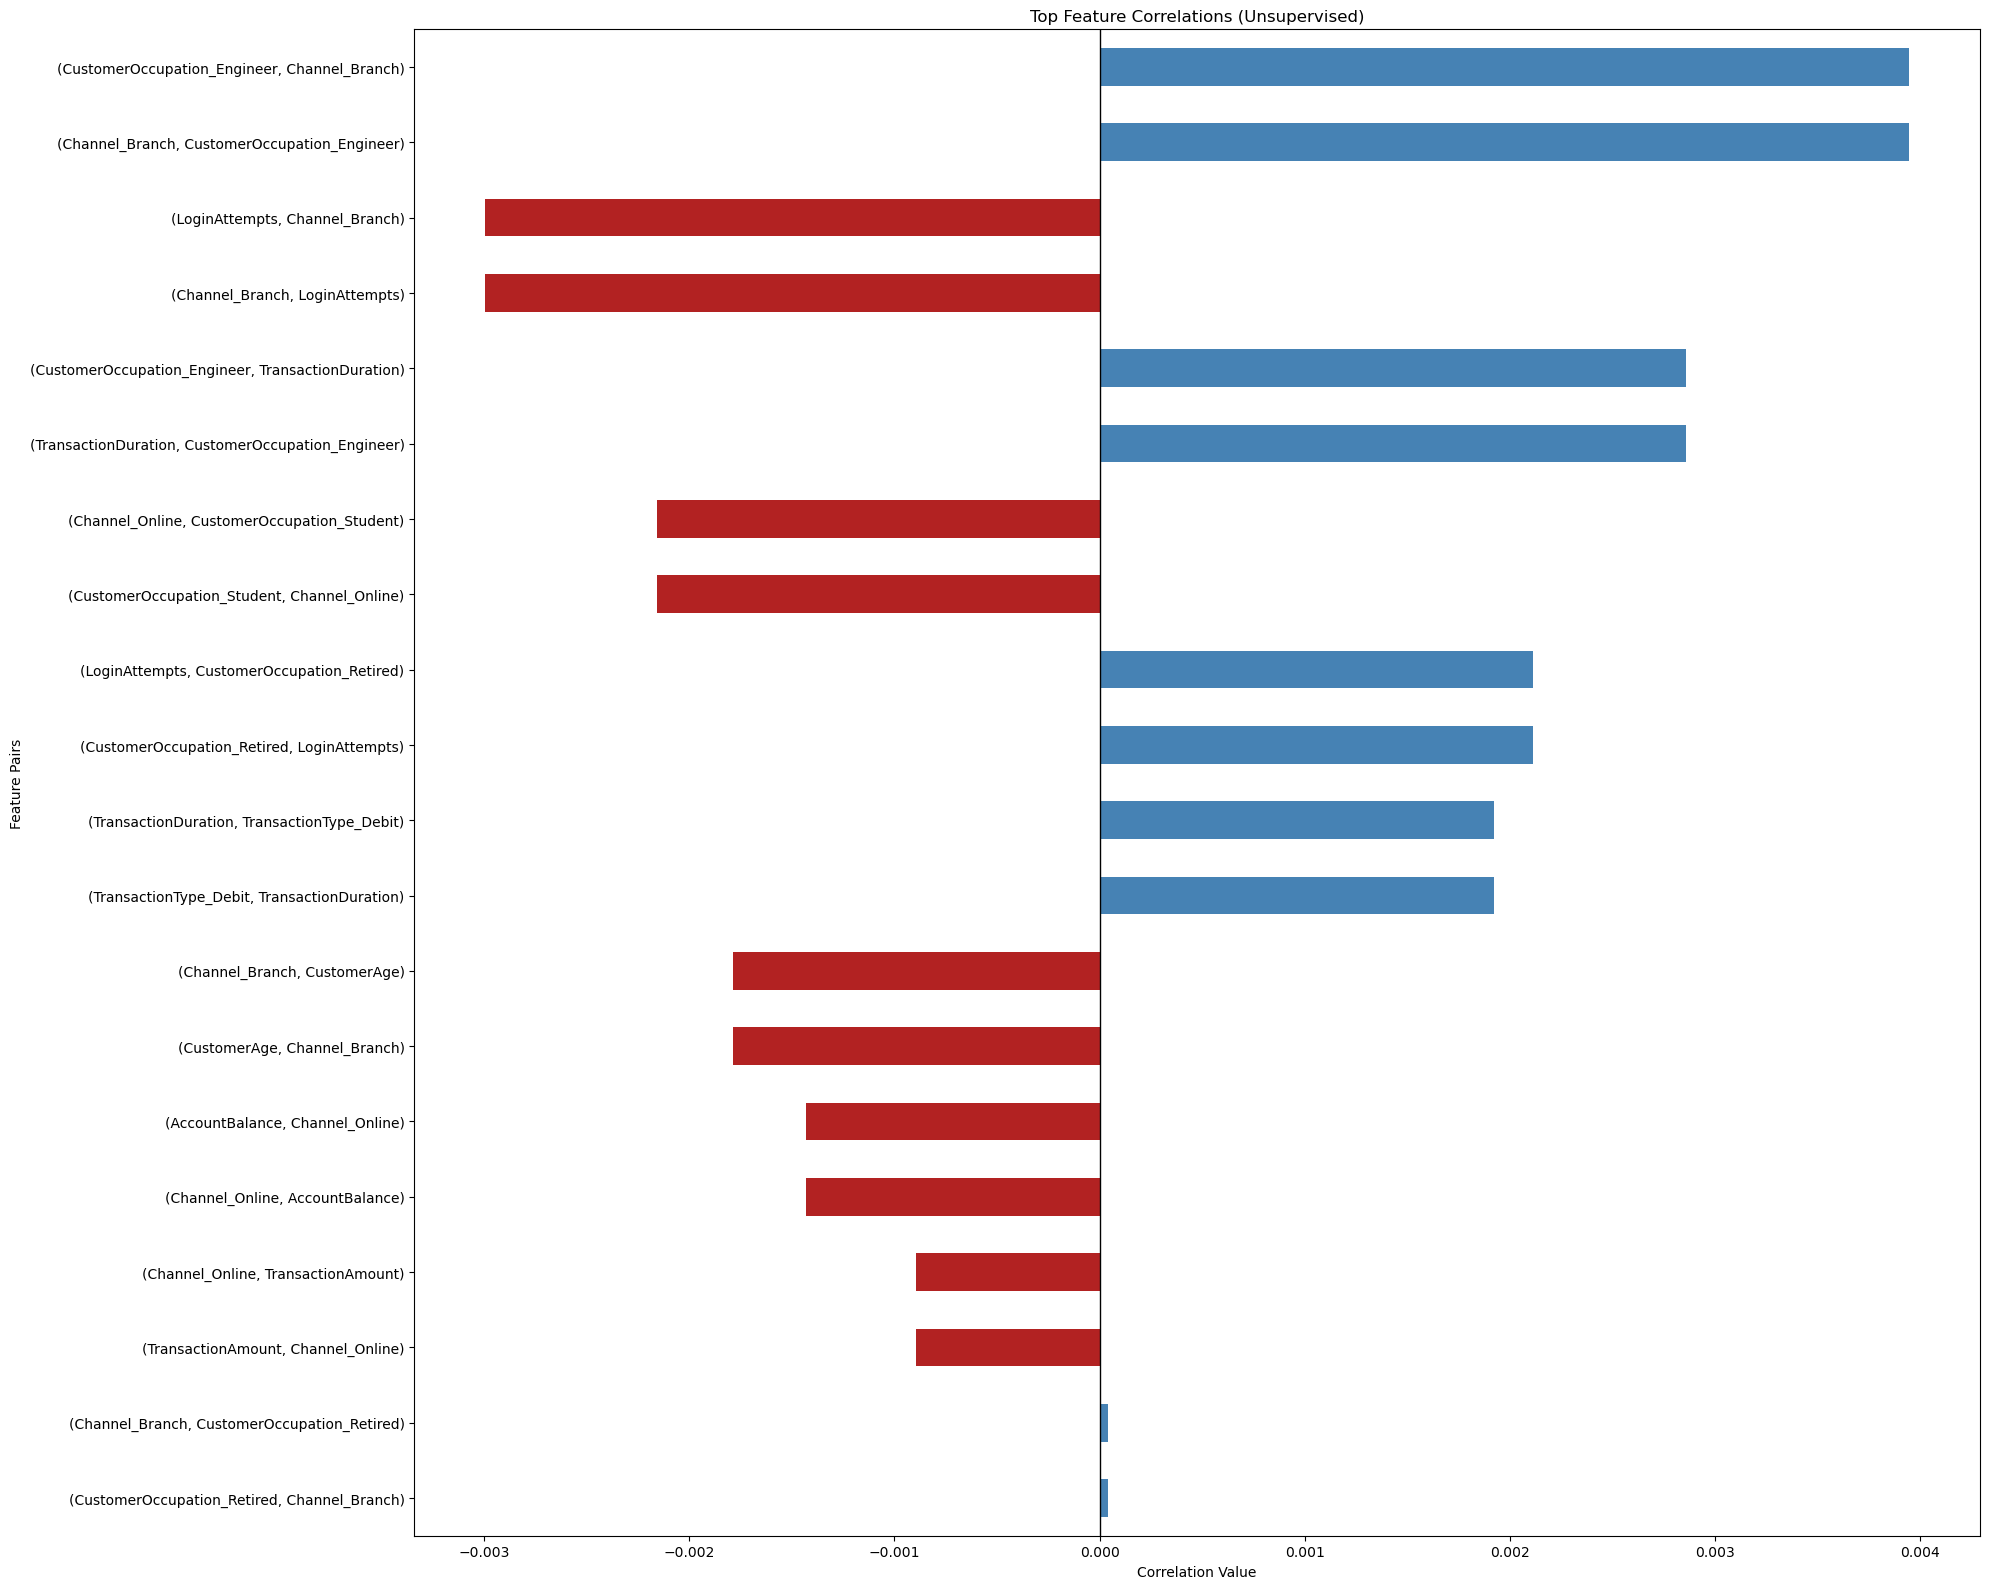

In [ ]:
#find out the top features correlations
top_corr = corr_unstacked.reindex(corr_unstacked.abs().sort_values(ascending=True).index).head(20)

# Bar plot
colors = ['steelblue' if val > 0 else 'firebrick' for val in top_corr]
plt.figure(figsize=(20, 16))
top_corr.plot(kind='barh', color=colors)
plt.axvline(0, color='black', linewidth=1)
plt.title('Top Feature Correlations (Unsupervised)')
plt.xlabel('Correlation Value')
plt.ylabel('Feature Pairs')
plt.tight_layout()

**Strongest Positive Correlations (Blue):**
- Engineer occupation with Channel_Branch (~0.004) - Engineers prefer branch banking
- Engineer occupation with TransactionDuration (~0.003) - Engineers spend more time per transaction
- Retired occupation with LoginAttempts (~0.002) - Retired customers have more login attempts

**Strongest Negative Correlations (Red):**
- LoginAttempts with Channel_Branch (~-0.003) - Branch users have fewer login issues
- Student occupation with Channel_Online (~-0.002) - Students less likely to use online banking
- CustomerAge with Channel_Branch (~-0.0018) - Younger customers avoid branches

**Key Patterns:**
- Channel preference varies by occupation and age demographics
- Security/access patterns (LoginAttempts) relate to channel choice
- All correlations are extremely weak (< 0.005), suggesting minimal linear relationships between these feature pairs

In [47]:
# positive and negative correlations
positive_corr = corr_unstacked[corr_unstacked > 0].sort_values(ascending=True).head(15)
negative_corr = corr_unstacked[corr_unstacked < 0].sort_values(ascending=False).head(15)

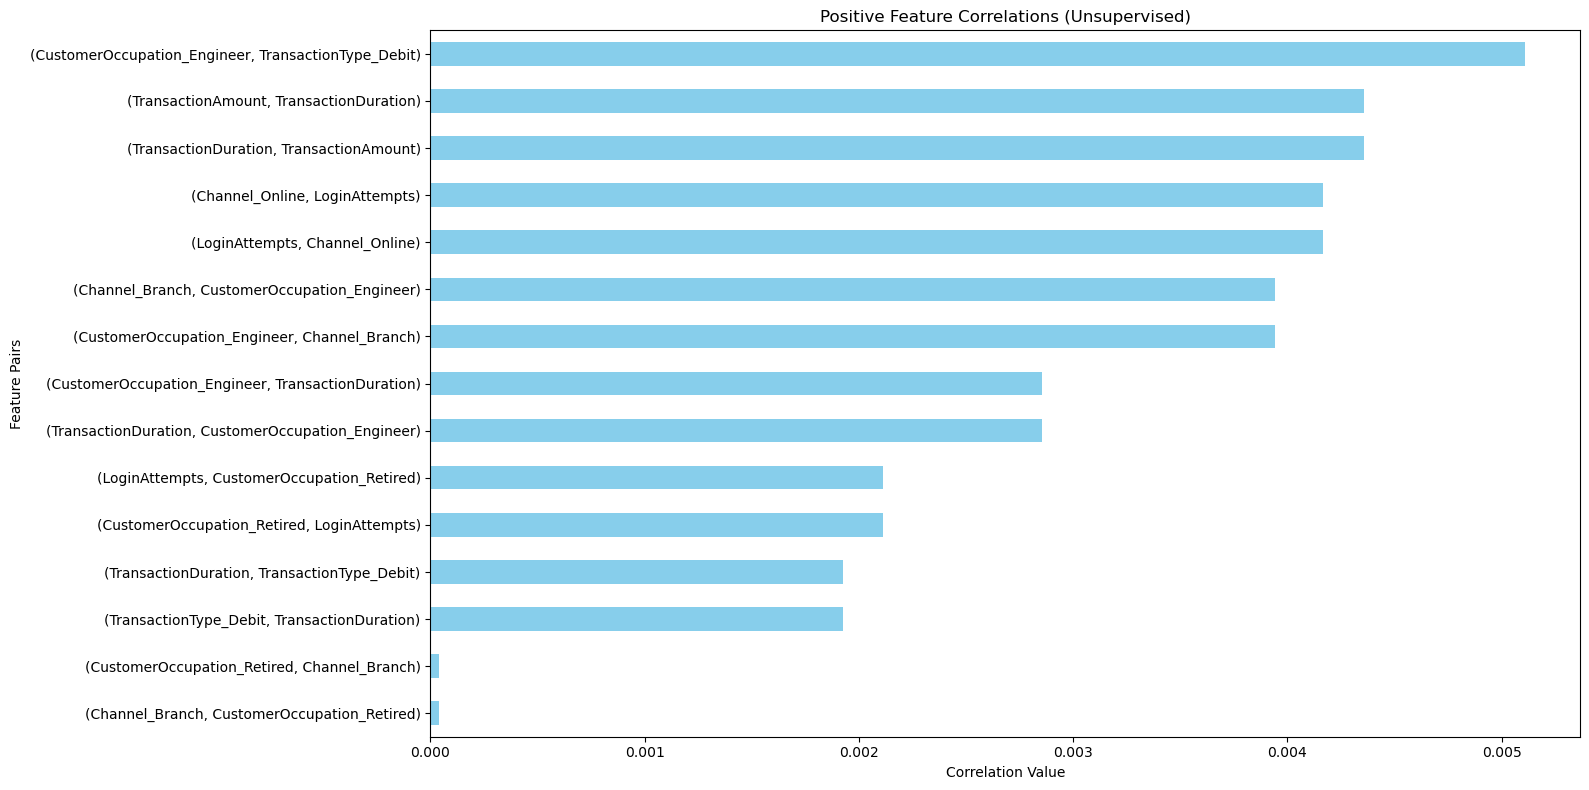

In [48]:
# bar plot for  for top 20 positive correlations
plt.figure(figsize=(16, 8))
positive_corr.plot(kind='barh', color='skyblue', label='Positive Correlations')
plt.title('Positive Feature Correlations (Unsupervised)')
plt.xlabel('Correlation Value')
plt.ylabel('Feature Pairs')
plt.tight_layout()

**Transaction Behavior Patterns:**
- TransactionAmount and TransactionDuration are positively correlated (~0.0044) - larger transactions take longer
- Engineer occupation associates with debit transactions (~0.0051) - Engineers prefer debit over other transaction types
- Engineers have longer TransactionDuration (~0.003) - more deliberate transaction behavior

**Channel Usage Patterns:**
- Engineers strongly prefer Channel_Branch (~0.004) - branch banking preference among Engineers
- Online channel users have more LoginAttempts (~0.0042) - online banking requires more authentication attempts
- Retired customers rarely use branches (~0.00004) - minimal branch preference

**Access & Security:**
- Retired customers have higher LoginAttempts (~0.002) - potential authentication difficulties
- LoginAttempts correlate with online channel usage - authentication challenges in digital banking

**Key Insight:**
All correlations are very weak (< 0.006), indicating features are largely independent. Engineer occupation shows the most consistent patterns across transaction type, duration, and channel preference.

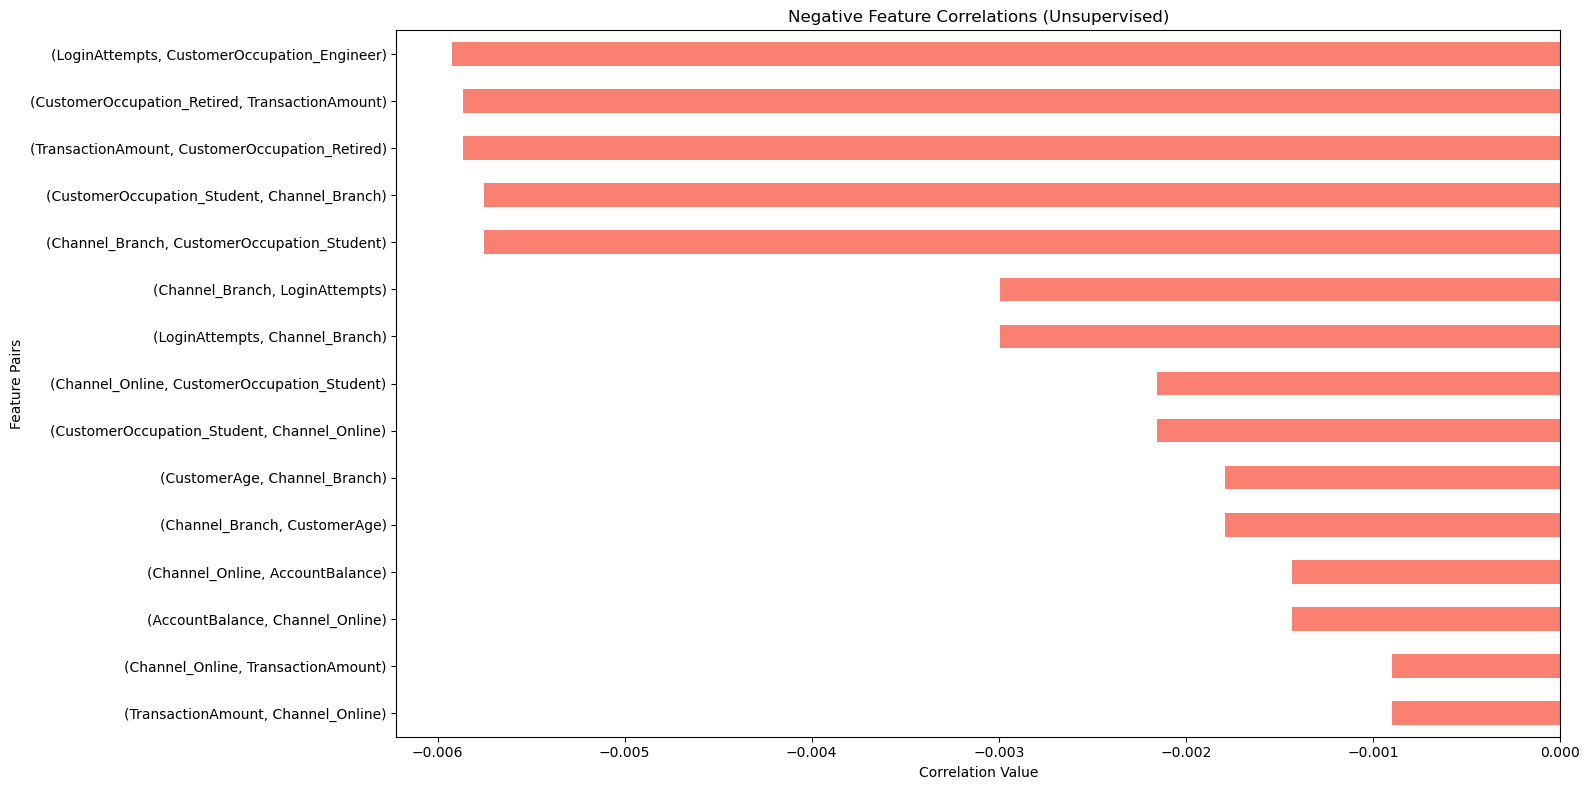

In [49]:
#bar plot for top 20 negative correlations
plt.figure(figsize=(16, 8))
negative_corr.plot(kind='barh', color='salmon', label='Negative Correlations')
plt.title('Negative Feature Correlations (Unsupervised)')
plt.xlabel('Correlation Value')
plt.ylabel('Feature Pairs')
plt.tight_layout()

**Occupation-Based Patterns:**
- Engineers have fewer LoginAttempts (~-0.006) - better authentication success
- Retired customers make smaller TransactionAmounts (~-0.006) - conservative spending behavior
- Students avoid Channel_Branch (~-0.0058) - strong preference against branch banking
- Students less likely to use Channel_Online (~-0.002) - possibly use mobile apps instead

**Channel-Related Patterns:**
- Branch channel has fewer LoginAttempts (~-0.003) - more secure/easier authentication at branches
- Younger CustomerAge avoids branches (~-0.0018) - digital-first younger generation
- Online channel negatively correlates with AccountBalance (~-0.0014) - lower balance customers prefer online
- Online channel has smaller TransactionAmount (~-0.0009) - smaller transactions online vs branch

**Key Insights:**
- Branch banking shows inverse relationship with login difficulties - physical presence reduces authentication issues
- Occupation significantly influences both channel preference and transaction patterns
- All correlations remain very weak (< 0.006), confirming features are largely independent
- Digital channels (online) associate with lower balances and smaller transactions

## Machine learning